In [ ]:
import pandas as pd
# Mount the drive to access data
from google.colab import drive
drive.mount('/content/drive')
# Load the patient details
data = pd.read_csv('/content/drive/My Drive/for sharing/covid inflammatory markers.csv')
data

Mounted at /content/drive


,no,age,sex,severe,outcome,IL6,LDH,Ferritin,CRP,Hemoglobin,TLC,Neutrophil %,Lymphocyte %,Monocyte %,Platelet Count,ANC,ALC,NLR,PLR,LCR
0,1,26,M,0,survived,290.37,501,2000.0,14.6,5.6,5.61,59.7,24.1,8.2,325,3.35,1.35,2.48,240.38,1.65
1,2,47,F,0,survived,21.31,645,169.0,10.6,13.8,21.20,90.0,5.0,3.0,411,19.08,1.06,18.00,387.74,0.47
2,3,74,F,0,survived,4.67,1477,431.0,4.5,10.1,17.80,90.0,5.0,5.0,870,16.02,0.89,18.00,977.53,1.11
3,4,70,M,0,survived,49.20,1385,40.0,1.0,9.7,12.16,74.1,14.3,11.2,271,9.01,1.74,5.18,155.85,14.30
4,5,58,M,0,survived,185.36,653,2000.0,28.2,6.7,20.90,95.0,3.0,2.0,288,19.86,0.63,31.67,459.33,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,758,35,M,0,death,200.21,722,760.0,37.4,13.1,9.76,88.9,7.1,3.7,15,8.68,0.69,12.52,21.65,0.19
397,760,43,M,0,survived,259.97,418,285.0,20.0,10.0,10.39,53.7,35.0,8.6,250,5.58,3.64,1.53,68.75,1.75
398,762,39,M,0,survived,23.78,513,471.0,5.0,16.7,4.18,74.4,12.7,12.7,265,3.11,0.53,5.86,499.19,2.54
399,763,70,M,0,survived,60.79,6705,1630.0,18.0,14.4,9.13,87.0,6.5,6.4,132,7.94,0.59,13.38,222.43,0.36


In [ ]:
!pip install ace_tools

ERROR: Could not find a version that satisfies the requirement ace_tools (from versions: none)
ERROR: No matching distribution found for ace_tools


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind



# Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Ensure columns are treated as numeric where appropriate
data = data.apply(pd.to_numeric, errors='ignore')

# Separate the data into survived and death groups
survived_group = data[data['outcome'] == 'survived']
death_group = data[data['outcome'] == 'death']

# Define the numerical columns to be analyzed
numerical_columns = ['age', 'IL6', 'LDH', 'Ferritin', 'CRP', 'Hemoglobin',
                     'TLC', 'Neutrophil %', 'Lymphocyte %', 'Monocyte %',
                     'Platelet Count', 'ANC', 'ALC', 'NLR', 'PLR', 'LCR']

# Calculate the mean and standard deviation for each group and perform t-tests
summary = []

for column in numerical_columns:
    mean_survived = survived_group[column].mean()
    std_survived = survived_group[column].std()
    mean_death = death_group[column].mean()
    std_death = death_group[column].std()
    t_stat, p_value = ttest_ind(survived_group[column].dropna(), death_group[column].dropna(), equal_var=False)

    summary.append({
        'Parameter': column,
        'Mean (SD) in survived group': f"{mean_survived:.2f} ({std_survived:.2f})",
        'Mean (SD) in death group': f"{mean_death:.2f} ({std_death:.2f})",
        'p-value': p_value
    })

# Convert summary to a DataFrame for better display
summary_df = pd.DataFrame(summary)



,Parameter,Mean (SD) in survived group,Mean (SD) in death group,p-value
0,age,51.52 (16.06),53.89 (14.62),0.147
1,IL6,173.74 (349.92),450.01 (553.15),0.000
2,LDH,670.49 (558.84),835.35 (641.71),0.014
3,Ferritin,996.54 (1573.49),1738.16 (2892.18),0.008
4,CRP,9.92 (11.65),15.25 (10.85),0.000
5,Hemoglobin,10.89 (2.76),11.22 (2.88),0.289
6,TLC,11.52 (6.42),15.30 (9.64),0.000
7,Neutrophil %,79.35 (13.11),83.93 (12.06),0.001
8,Lymphocyte %,13.00 (9.88),9.83 (10.27),0.004
9,Monocyte %,5.72 (4.30),4.68 (2.78),0.004


In [ ]:
# Display the summary table
stat_table = summary_df.round(3)
stat_table

stat_table.to_csv('stat_table.csv')

In [ ]:
import pandas as pd
from scipy.stats import fisher_exact


# Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Combine the same categories with different cases
data['sex'] = data['sex'].str.upper()

# Separate the data into survived and death groups
survived_group = data[data['outcome'] == 'survived']
death_group = data[data['outcome'] == 'death']

# Define the categorical columns to be analyzed
categorical_columns = ['sex', 'severe']

# Initialize a list to store the summary
categorical_summary = []

# Calculate the number and percentage for each group and perform Fisher's exact test
for column in categorical_columns:
    survived_counts = survived_group[column].value_counts()
    death_counts = death_group[column].value_counts()

    # Create a contingency table
    contingency_table = pd.DataFrame({
        'survived': survived_counts,
        'death': death_counts
    }).fillna(0)

    for category in contingency_table.index:
        survived_count = contingency_table.at[category, 'survived']
        death_count = contingency_table.at[category, 'death']
        total_survived = survived_group.shape[0]
        total_death = death_group.shape[0]

        # Calculate percentages
        survived_percentage = (survived_count / total_survived) * 100
        death_percentage = (death_count / total_death) * 100

        # Create a 2x2 table for Fisher's exact test
        table = [[survived_count, total_survived - survived_count],
                 [death_count, total_death - death_count]]

        # Perform Fisher's exact test
        _, p_value = fisher_exact(table)

        # Append the results to the summary list
        categorical_summary.append({
            'Parameter': f"{column} - {category}",
            'Number (percentage) in survived group': f"{survived_count} ({survived_percentage:.2f}%)",
            'Number (percentage) in death group': f"{death_count} ({death_percentage:.2f}%)",
            'p-value': p_value
        })

# Convert the summary to a DataFrame for better display
categorical_summary_df = pd.DataFrame(categorical_summary)
categorical_summary_df = categorical_summary_df.round(3)
# Display the summary table
categorical_summary_df


,Parameter,Number (percentage) in survived group,Number (percentage) in death group,p-value
0,sex - M,181 (65.34%),86 (69.35%),0.492
1,sex - F,96 (34.66%),38 (30.65%),0.492
2,severe - 0,222 (80.14%),12 (9.68%),0.000
3,severe - 1,55 (19.86%),112 (90.32%),0.000


In [ ]:
categorical_summary_df.to_csv('categorical_summary.csv')

<ipython-input-15-e2dd7d7277c2>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y=column, data=data, ax=axes[i], palette=palette)
<ipython-input-15-e2dd7d7277c2>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y=column, data=data, ax=axes[i], palette=palette)
<ipython-input-15-e2dd7d7277c2>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y=column, data=data, ax=axes[i], palette=palette)
<ipython-input-15-e2dd7d7277c2>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

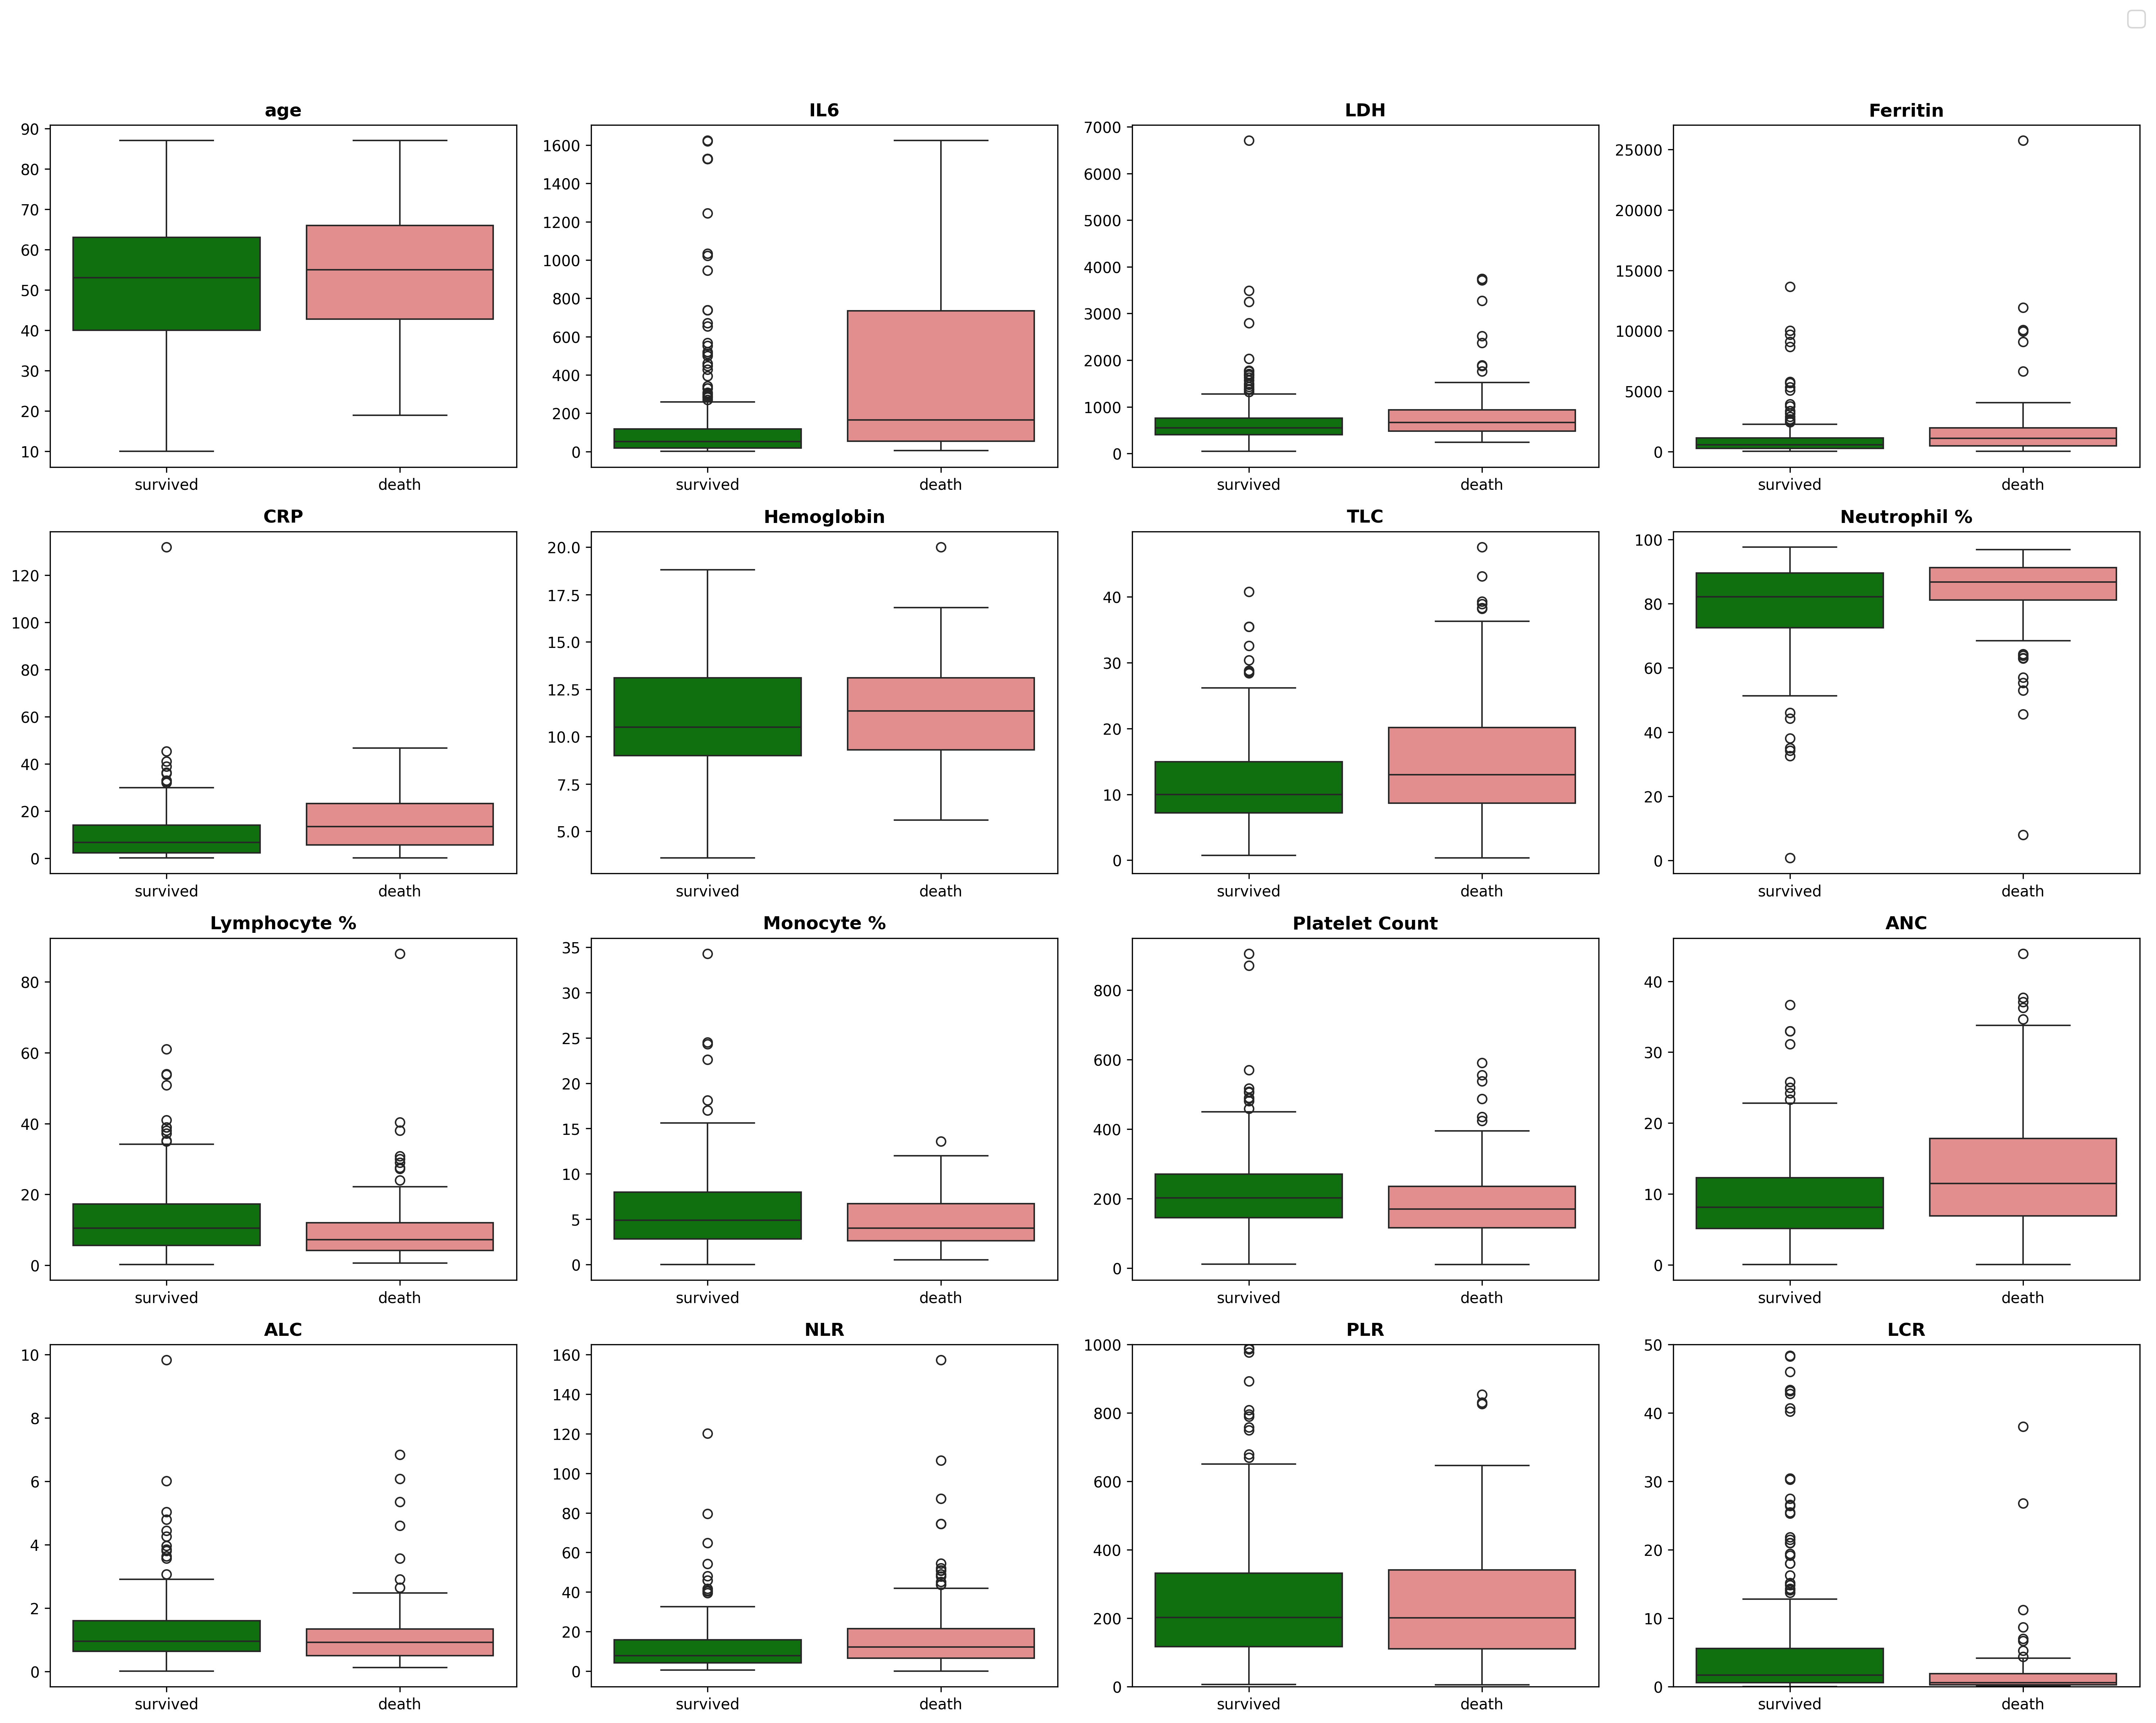

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact



# Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Combine the same categories with different cases
data['sex'] = data['sex'].str.upper()

# Separate the data into survived and death groups
survived_group = data[data['outcome'] == 'survived']
death_group = data[data['outcome'] == 'death']

# Define the numerical columns to be analyzed
numerical_columns = ['age', 'IL6', 'LDH', 'Ferritin', 'CRP', 'Hemoglobin',
                     'TLC', 'Neutrophil %', 'Lymphocyte %', 'Monocyte %',
                     'Platelet Count', 'ANC', 'ALC', 'NLR', 'PLR', 'LCR']

# Set the color palette
palette = {"survived": "green", "death": "lightcoral"}

# Define the number of columns for the subplot grid
num_columns = 4
num_rows = 4

# Create a figure with 4 rows and 4 columns with high DPI for ultra HD quality
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 4), dpi=300)
axes = axes.flatten()

# Adjust y-axis limits for PLR and LCR for better visibility
custom_limits = {
    'PLR': (0, 1000),  # Adjust as necessary
    'LCR': (0, 50)     # Adjust as necessary
}

# Generate boxplots for each numerical variable
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='outcome', y=column, data=data, ax=axes[i], palette=palette)
    axes[i].set_title(column, fontsize='large', fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    # Apply custom y-axis limits if specified
    if column in custom_limits:
        axes[i].set_ylim(custom_limits[column])

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize='x-large')

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure in ultra HD quality
fig.savefig('boxplots_hd.png', format='png', dpi=300)
plt.show()
plt.close(fig)
